In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Reading the CSV file

In [2]:
df = pd.read_csv('fifa21 raw data v2.csv', low_memory = False)

## First 5 rows of the data frame

In [3]:
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


## Names of Columns

In [4]:
df.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

## Checking the Height and Weight data types

In [5]:
df[['Height', 'Weight']].dtypes

Height    object
Weight    object
dtype: object

## Getting the unique values of Heights

In [6]:
df['Height'].unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

## Function to Convert all the heights to floating data type and in Centimeters

In [7]:
def convert_cm(height):
    if 'cm' in height:
        return float(height.replace('cm', ''))
    else:
        feet, inches = height.split('\'')
        feet = float(feet)
        inches = float(inches.replace('"', ''))
        return (feet * 30.48) + (inches * 2.54)

In [8]:
df['Height'] = df['Height'].apply(convert_cm)

In [9]:
df['Height'].unique()

array([170.  , 187.  , 188.  , 181.  , 175.  , 184.  , 191.  , 178.  ,
       193.  , 185.  , 199.  , 173.  , 168.  , 176.  , 177.  , 183.  ,
       180.  , 189.  , 179.  , 195.  , 172.  , 182.  , 186.  , 192.  ,
       165.  , 194.  , 167.  , 196.  , 163.  , 190.  , 174.  , 169.  ,
       171.  , 197.  , 200.  , 166.  , 187.96, 164.  , 198.  , 190.5 ,
       195.58, 180.34, 193.04, 185.42, 182.88, 177.8 , 175.26, 167.64,
       170.18, 162.56, 201.  , 158.  , 162.  , 161.  , 160.  , 203.  ,
       157.  , 156.  , 202.  , 159.  , 206.  , 155.  ])

## Getting the unique values of Heights

In [10]:
df['Weight'].unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs', '185lbs',
       '170lbs', '203lbs', '168lbs', '161lbs', '146lbs', '130lbs',
       '190lbs', '174lbs', '148lbs', '165lbs', '159lbs', '192lbs',
       '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg', '103kg',
       '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg', '107kg',
       '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

## Function to Convert all the weights to floating data type and in Kilograms

In [11]:
def convert_kg(weight):
    if 'kg' in weight:
        return float(weight.replace('kg', ''))
    else:
        return round(float(weight.replace('lbs', '')) / 2.2, 2)

In [12]:
df['Weight'] = df['Weight'].apply(convert_kg)

In [13]:
df['Weight'].unique()

array([ 72.  ,  83.  ,  87.  ,  70.  ,  68.  ,  80.  ,  71.  ,  91.  ,
        73.  ,  85.  ,  92.  ,  69.  ,  84.  ,  96.  ,  81.  ,  82.  ,
        75.  ,  86.  ,  89.  ,  74.  ,  76.  ,  64.  ,  78.  ,  90.  ,
        66.  ,  60.  ,  94.  ,  79.  ,  67.  ,  65.  ,  59.  ,  61.  ,
        93.  ,  88.  ,  97.  ,  77.  ,  62.  ,  63.  ,  95.  , 100.  ,
        58.  ,  83.18,  81.36,  78.18,  89.09,  84.09,  77.27,  92.27,
        76.36,  73.18,  66.36,  59.09,  86.36,  79.09,  67.27,  72.27,
        87.27,  82.27,  63.18,  71.36,  74.09,  98.  , 103.  ,  99.  ,
       102.  ,  56.  , 101.  ,  57.  ,  55.  , 104.  , 107.  , 110.  ,
        53.  ,  50.  ,  54.  ,  52.  ])

## Split the Combined Join Date to Day Month Year

In [14]:
df['Joined'].head()

0     Jul 1, 2004
1    Jul 10, 2018
2    Jul 16, 2014
3    Aug 30, 2015
4     Aug 3, 2017
Name: Joined, dtype: object

In [15]:
df[['Month' ,'Day-Year']] = df['Joined'].str.split(' ', n = 1, expand = True)
df[['Day', 'Year']] = df['Day-Year'].str.split(',', n = 1, expand = True)
df.drop(columns=['Joined', 'Day-Year'], axis = 1)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Month,Day,Year
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,85,92,91,95,38,65,771,Jul,1,2004
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,89,93,81,89,35,77,562,Jul,10,2018
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,87,92,78,90,52,90,150,Jul,16,2014
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,76,86,93,88,64,78,207,Aug,30,2015
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,91,85,86,94,36,59,595,Aug,3,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,\n\n\n\nWuhan Zall,...,64,28,26,38,48,51,NaN,Jul,13,2018
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,\n\n\n\nOldham Athletic,...,64,40,48,49,35,45,NaN,Aug,1,2020
18976,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47,65,\n\n\n\nDerry City,...,63,39,44,46,40,53,NaN,Mar,8,2019
18977,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47,57,\n\n\n\nDalian YiFang FC,...,58,49,41,49,30,44,NaN,Sep,22,2020


In [16]:
df[['Month', 'Day', 'Year']].head()

,Month,Day,Year
0,Jul,1,2004
1,Jul,10,2018
2,Jul,16,2014
3,Aug,30,2015
4,Aug,3,2017


## Converting the Money to Floating data type by replacing M and K by its powers

In [17]:
df[['Value', 'Wage', 'Release Clause']].head()

,Value,Wage,Release Clause
0,€103.5M,€560K,€138.4M
1,€63M,€220K,€75.9M
2,€120M,€125K,€159.4M
3,€129M,€370K,€161M
4,€132M,€270K,€166.5M


In [18]:
df[['Value', 'Wage', 'Release Clause']].isna().sum()

Value             0
Wage              0
Release Clause    0
dtype: int64

In [19]:
df[['Value', 'Wage', 'Release Clause']].isnull().sum()

Value             0
Wage              0
Release Clause    0
dtype: int64

## Function to convert Money

In [20]:
def convert_money(money):
    if 'M' in money:
        return float(money.replace('€', '').replace('M', '')) * 1e6
    elif 'K' in money:
        return float(money.replace('€', '').replace('K', '')) * 1e3
    else:
        return float(money.replace('€', ''))

In [21]:
df['Value'] = df['Value'].apply(convert_money)
df['Wage'] = df['Wage'].apply(convert_money)
df['Release Clause'] = df['Release Clause'].apply(convert_money)

In [22]:
df[['Value', 'Wage', 'Release Clause']].head()

,Value,Wage,Release Clause
0,103500000.0,560000.0,138400000.0
1,63000000.0,220000.0,75900000.0
2,120000000.0,125000.0,159400000.0
3,129000000.0,370000.0,161000000.0
4,132000000.0,270000.0,166500000.0


## Highest number of Hits

In [23]:
df['Hits']

0        771
1        562
2        150
3        207
4        595
        ... 
18974    NaN
18975    NaN
18976    NaN
18977    NaN
18978    NaN
Name: Hits, Length: 18979, dtype: object

In [24]:
df['Hits'] = df['Hits'].str.replace('\n', '')
df['Hits']

0        771
1        562
2        150
3        207
4        595
        ... 
18974    NaN
18975    NaN
18976    NaN
18977    NaN
18978    NaN
Name: Hits, Length: 18979, dtype: object

## Visualization of Number of players vs Their nationality

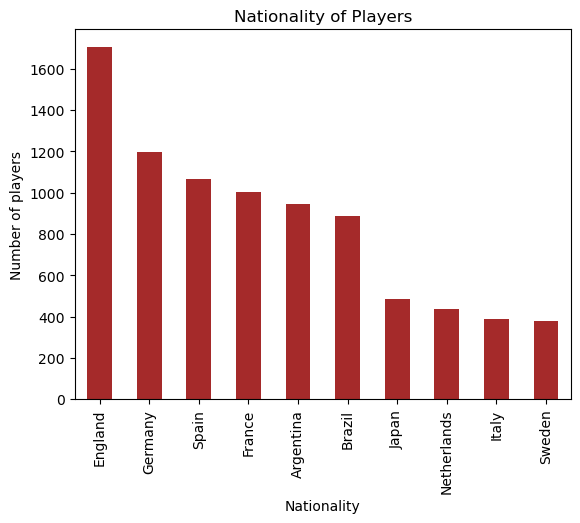

In [25]:
No_of_players= df.groupby(['Nationality']).size().sort_values(axis = 0, ascending = False)
No_of_players.head(10)

No_of_players.head(10).plot(kind='bar',color='brown')
 
plt.xlabel("Nationality")
plt.ylabel("Number of players")
plt.title("Nationality of Players")
plt.show()

## Visualzation of Age vs number of players

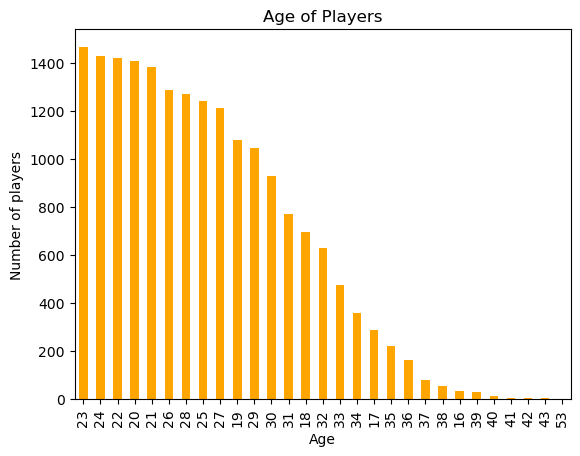

In [26]:
Age_of_players= df.groupby(['Age']).size().sort_values(axis = 0, ascending = False)

Age_of_players.plot(kind='bar',color='orange')
plt.xlabel("Age")
plt.ylabel("Number of players")
plt.title("Age of Players")
plt.show()

## Visualization of Number of Hits vs Player name

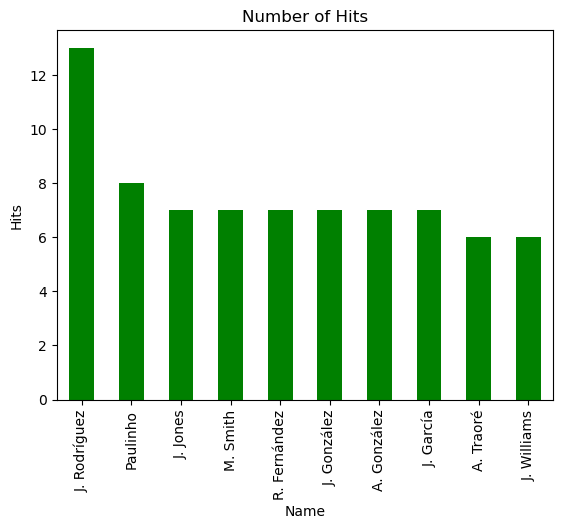

In [27]:
Number_of_hits = df.groupby(['Name']).size().sort_values(axis = 0,ascending = False)

Number_of_hits.head(10).plot(kind='bar',color='green')
plt.xlabel("Name")
plt.ylabel("Hits")
plt.title("Number of Hits")
plt.show()

## List of Top Players

In [28]:
Best_players = df.sort_values(['↓OVA', 'Hits'],ascending=[False, False]).head(10)

Top= Best_players[['Name', '↓OVA', 'Hits']]
Top_players=Top.head(10)
Top_players

,Name,↓OVA,Hits
0,L. Messi,93,771
1,Cristiano Ronaldo,92,562
4,Neymar Jr,91,595
5,R. Lewandowski,91,248
3,K. De Bruyne,91,207
2,J. Oblak,91,150
10,V. van Dijk,90,321
6,M. Salah,90,246
11,S. Mané,90,189
9,M. ter Stegen,90,130


## Filtering the unwanted things from the Table

In [29]:
def remove_n(team):
    if '\n' in team:
        return team.replace('\n', '')

In [30]:
df['Club'] = df['Club'].apply(remove_n)

## Number of Clubs participating in FIFA 21

In [31]:
Teams = df['Club'].value_counts() 
Teams.count()

681

## Top 100 players

In [32]:
best_players = df.sort_values('↓OVA',ascending = False).head(100)
best_players.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,SHO,PAS,DRI,DEF,PHY,Hits,Month,Day-Year,Day,Year
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,...,92,91,95,38,65,771,Jul,"1, 2004",1,2004
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,...,93,81,89,35,77,562,Jul,"10, 2018",10,2018
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,...,92,78,90,52,90,150,Jul,"16, 2014",16,2014
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,...,86,93,88,64,78,207,Aug,"30, 2015",30,2015
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,...,85,86,94,36,59,595,Aug,"3, 2017",3,2017


## Number of clubs to whom these top 100 players belong to

In [33]:
Team_vals = best_players['Club'].value_counts()
Team_vals.count()

25

## Visualization of Number of best players vs Club names

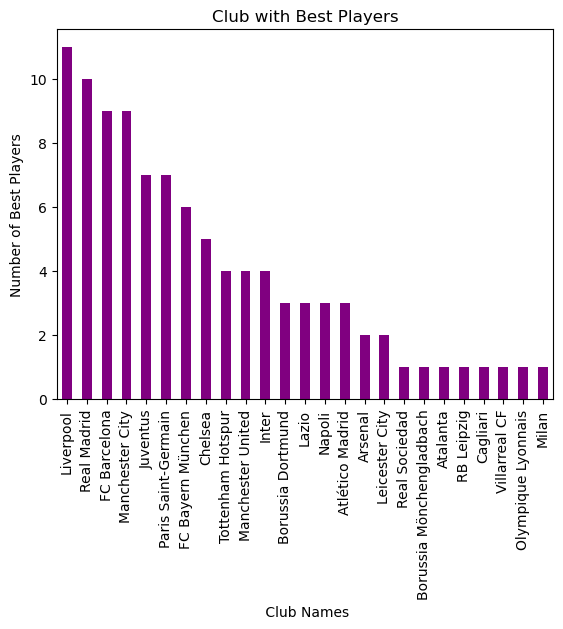

In [34]:
Team_vals.plot(kind="bar",color='purple');
plt.title("Club with Best Players");
plt.xlabel(" Club Names")
plt.ylabel("Number of Best Players")
plt.show()

## Conclusion
-We got to know that most of the players are from 'England', 'Germany', 'Spain', 'France' and 'Argentina'.

-Players Age range is from 53-23 most of the players age is 23.

-Highest number of Hits is 13 by J. Rodríguez.

-Best player based on OVA and Hits is L. Messi with 93 OVA and 372 Hits

-There are 681 different Teams participated in FIFA 2021

-There are 25 Teams in FIFA 2021 with best 100 FIFA Players

-Liverpool Team has 11 players which are among best 100 FIFA players, Liverpool team has highest best player count as compared to other countries.